<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to provide an introduction to the terminology around ML models, and probabilistic/statistical models, in particular.

### What is a model?
In statistics, a model refers to a probability measure.
> Recall that a **probability measure** is essentially a function, defined on a sample space, that assigns a probability to each sample.

There can be many many probability measures that can be defined on the given space, let us call it ${\bf X}$. Let the space of all probability measures be denoted as $PM({\bf X})$.

A model is a subset $M \subset PM({\bf X})$. Each member of $M$ is indexed by a parameter $\theta$, whose values are in a **parameter space**, ${\bf T}$.

$$
M = \{P_\theta \vert \theta \in {\bf T}\}
$$

### Difference between parametric and non-parametric models
- If ${\bf T}$ has finite dimension, i.e., ${\bf T} \subset \mathbb{R}^d$ for some $n \in \mathbb{N}$, then $M$ is a **parametric model**
- If ${\bf T}$ has infinite dimension, then $M$ is a **non-parametric model**

### Statistical inference
Given some observations $x_1,x_2,\ldots,x_n \in {\bf X}$, draw conclusions about the value of $\theta$.

<img src="images/measures.png"/>

- If ${\bf T}$ has finite dimension, then M will be finite
- But what happens if ${\bf T}$ has infinite dimension?

#### Example:
Consider a small data set

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
%matplotlib inline

In [3]:
X = np.array([-4.8,0.4,1.2,5.3,8.7,9.8,11.0,13.3])

### Parametric inference
Assume that $M$ is the set of all one dimensional Gaussians with two parameters, $\mu$ and $\sigma^2$, i.e., ${\bf T} \in \mathbb{R}^2$ (finite). We can use maximum likelihood estimation (MLE) to infer the optimal $\theta$.

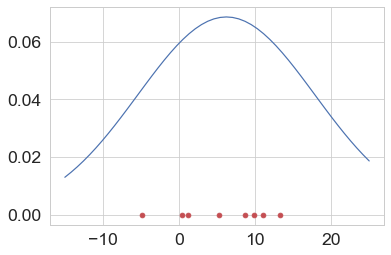

In [21]:
mu,sigma2 = norm.fit(X)
plt.plot(np.linspace(-15,25),norm(mu,sigma2).pdf(np.linspace(-5,15)))
plt.scatter(X,np.zeros(X.shape),c='r')

### Non-parametric inference
*Kernel density estimation* or KDE is a non-parametric method to "estimate" the model. However, the number of parameters grows with the size of training data, and can potentially become infinite, as the size of observed data, $X$, increases.

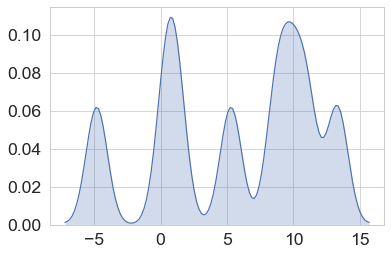

In [19]:
sns.kdeplot(X,bw=0.8,shade=True)

### Bayesian Models
In Bayesian world, the parameter $\theta$, is treated as a random variable, $\Theta$, whose domain is ${\bf T}$.
> This is the core Bayesian mantra - _all unknowns should be treated with randomness_

Since $\Theta$ is a random variable, there should be a probability distribution that determines the distribution of $\Theta$, let us denote it by $Q$ (also known as a **prior distribution**).

A **Bayesian model** consists of the observation model, $M$, and the prior distribution $Q$. The data is generated in two stages:
\begin{eqnarray}
\Theta & \sim\quad & Q\\
X_1,X_2, \ldots \vert \Theta & \sim_{iid} & P_\Theta
\end{eqnarray}

The objective (or at least one of the) of Bayesian learning is to determine the **posterior distribution** for $\Theta$, after observing the data.

### And finally! Non-parametric Bayesian model
A Bayesian model whose parameter space has infinte dimension. How does one define a prior probability distribution, $Q$ over the infinite dimensional space?